In [3]:
import numpy as np
import pandas as pd

In [4]:
cols = ['Result','t1_Score', 't1_FGM', 't1_FGA', 't1_FGM3', 't1_FGA3', 't1_FTM', 't1_FTA', 't1_OR', 't1_DR', 't1_Ast', 't1_TO', 't1_Stl', 't1_Blk', 't1_PF', 't2_Score', 't2_FGM', 't2_FGA', 't2_FGM3', 't2_FGA3', 't2_FTM', 't2_FTA', 't2_OR', 't2_DR', 't2_Ast', 't2_TO', 't2_Stl', 't2_Blk', 't2_PF']
df = pd.read_csv('model_ready_small.csv', header=None)
df.columns = cols

df.head()

,Result,t1_Score,t1_FGM,t1_FGA,t1_FGM3,t1_FGA3,t1_FTM,t1_FTA,t1_OR,t1_DR,...,t2_FGA3,t2_FTM,t2_FTA,t2_OR,t2_DR,t2_Ast,t2_TO,t2_Stl,t2_Blk,t2_PF
0,1.0,64.818182,23.636364,52.909091,5.727273,15.454545,11.818182,18.363636,11.181818,23.545455,...,11.700000,14.900000,24.100000,12.900000,22.400000,9.700000,19.000000,9.800000,2.600000,19.700000
1,1.0,78.600000,29.300000,63.600000,7.400000,19.500000,12.600000,17.100000,11.200000,22.100000,...,17.300000,15.000000,21.900000,10.200000,24.600000,11.900000,18.400000,6.400000,2.800000,19.000000
2,0.0,79.636364,26.000000,54.727273,6.363636,17.181818,21.272727,29.090909,12.272727,26.000000,...,20.300000,12.800000,20.900000,14.300000,25.100000,13.900000,14.900000,6.200000,3.200000,18.000000
3,1.0,78.600000,28.600000,60.900000,5.000000,16.100000,16.400000,24.500000,15.800000,27.900000,...,21.636364,13.909091,20.272727,14.454545,21.818182,12.181818,14.818182,7.909091,3.181818,23.454545
4,1.0,64.100000,24.400000,61.100000,5.000000,16.800000,10.300000,16.900000,15.200000,23.700000,...,17.000000,9.583333,16.166667,13.083333,22.000000,11.416667,14.916667,7.250000,1.166667,17.250000


In [5]:
concat_array = df.values
sub_array = []
for game in concat_array:
    sub_game = [None]*15
    sub_game[0] = game[0]
    sub_game[1:15] = game[1:15] - game[15:29]
    sub_array.append(sub_game)

In [6]:
sub_array

[[1.0,
  4.218181818181812,
  2.8363636363636395,
  1.009090909090908,
  1.6272727272727288,
  3.7545454545454575,
  -3.081818181818184,
  -5.736363636363638,
  -1.7181818181818205,
  1.1454545454545482,
  1.8454545454545457,
  1.9090909090909136,
  -2.8000000000000007,
  1.6727272727272715,
  -1.336363636363636],
 [1.0,
  8.59999999999998,
  5.100000000000001,
  11.0,
  0.8000000000000007,
  2.1999999999999993,
  -2.4000000000000004,
  -4.799999999999997,
  1.0,
  -2.5,
  2.4000000000000004,
  -5.099999999999998,
  -0.7000000000000002,
  0.0,
  0.1999999999999993],
 [0.0,
  9.336363636363657,
  1.0,
  -1.1727272727272648,
  -1.1363636363636367,
  -3.1181818181818173,
  8.472727272727276,
  8.190909090909088,
  -2.0272727272727273,
  0.8999999999999986,
  2.0999999999999996,
  0.6454545454545428,
  -0.4727272727272718,
  -0.01818181818181852,
  0.3636363636363633],
 [1.0,
  3.0545454545454334,
  1.2363636363636346,
  -3.3727272727272677,
  -1.9090909090909083,
  -5.536363636363639,
  2

In [7]:
targets = [g[0] for g in sub_array]
attrs = [g[1:17] for g in sub_array]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(attrs, targets, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

scaled = [preprocessing.scale(x) for x in [X_train, X_test, y_train, y_test]]
lr_model = LogisticRegression()
lr_model.fit(scaled[0],y_train)
prediction = lr_model.predict(scaled[1])
accuracy_score(y_test,prediction)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6706957266584181

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.6062624916722186

In [35]:
from sklearn.svm import SVC
clf = SVC(C=100, gamma=1.0, class_weight='balanced')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.5129913391072618

In [36]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.6330065670505377

Ok, so logistic regression performs the best. Now, witness the power of a fully functional GridSearchCV!

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ('l1','l2'), 'tol':(1e-3, 1e-4, 1e-5, 1e-6), 'C': (0.01, 0.1, 1, 10, 100), 'solver':('liblinear', 'saga'), 'max_iter': (100, 1000)}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid)
clf.fit(preprocessing.scale(attrs), targets)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/admin/anaconda3/lib/python3.7/site-packages/skle

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'tol': (0.001, 0.0001, 1e-05, 1e-06), 'C': (0.01, 0.1, 1, 10, 100), 'solver': ('liblinear', 'saga'), 'max_iter': (100, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
b_est = clf.best_estimator_
b_score = clf.best_score_

In [13]:
print(b_est)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.001, verbose=0, warm_start=False)


In [14]:
print(b_score)

0.6733415818026078


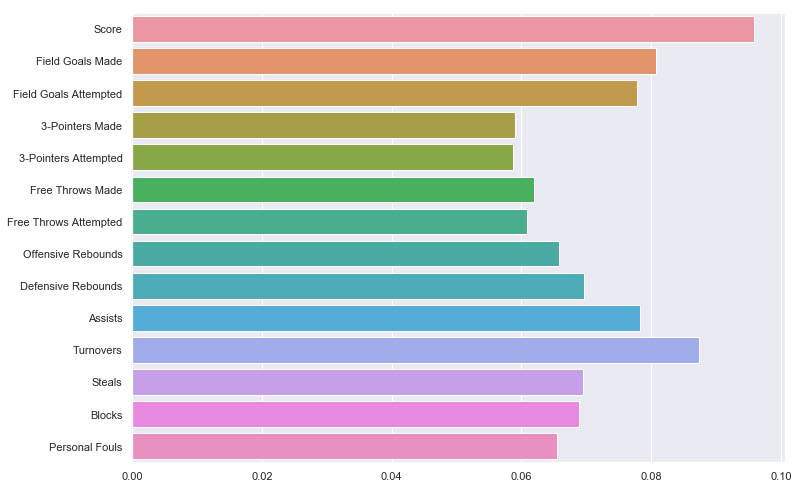

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
fi = rf_model.feature_importances_

import seaborn as sns
%matplotlib inline
cols = ['Score', 'Field Goals Made', 'Field Goals Attempted', '3-Pointers Made', '3-Pointers Attempted', 'Free Throws Made', 'Free Throws Attempted', 'Offensive Rebounds', 'Defensive Rebounds', 'Assists', 'Turnovers', 'Steals', 'Blocks', 'Personal Fouls']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=fi, y=cols)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_grid = {}

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=9)
clf.fit(X_train, y_train)
nn_predicts = clf.predict(X_test)
accuracy_score(y_test, nn_predicts)